Please check the README file


First, I selected 3 relevant features; however, I applied PCA on all the features

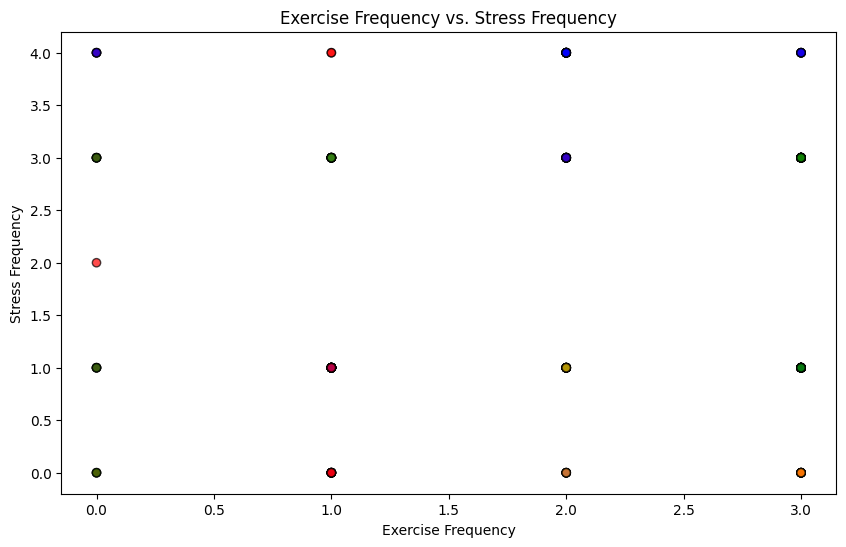

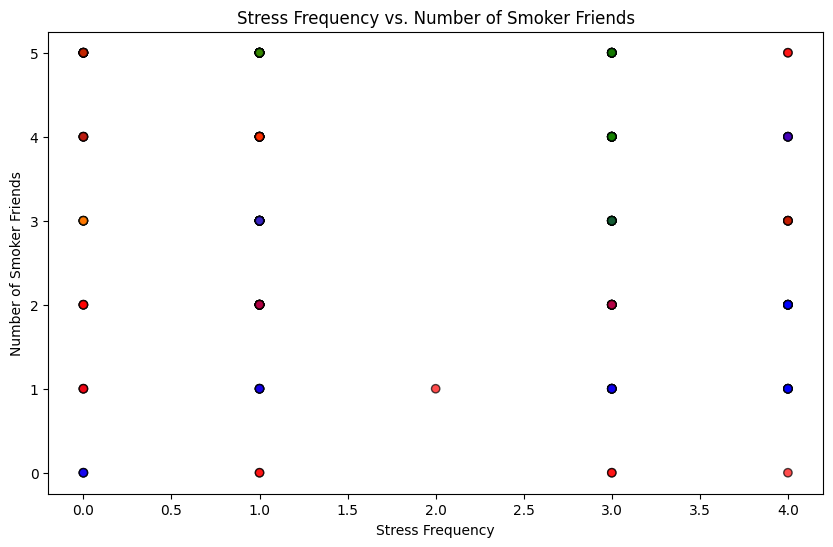

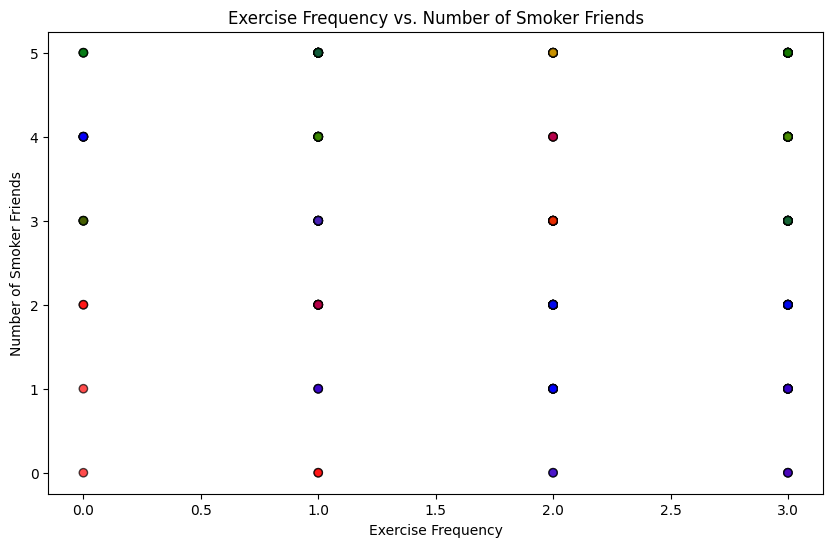

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "2024_PersonalityTraits_SurveyData.xls"
data = pd.read_excel(file_path)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode relevant categorical columns
columns_to_encode = [
    'How often do you exercise?',
    'How often do you feel stressed?',
    'Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?',
    'How many cigarettes do you smoke each day?'
]

# Apply LabelEncoder to each column
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Drop rows with missing values in these columns
data = data.dropna(subset=columns_to_encode)

# Extract the target variable for coloring
colors = data['How many cigarettes do you smoke each day?']

# Define a list of four distinct colors for the categories
category_colors = ['red', 'blue', 'green', 'orange']
color_map = [category_colors[int(c)] for c in colors]

# Plot Exercise Frequency vs. Stress Frequency
plt.figure(figsize=(10, 6))
plt.scatter(
    data['How often do you exercise?'],
    data['How often do you feel stressed?'],
    c=color_map,
    alpha=0.7,
    edgecolor='k'
)
plt.title("Exercise Frequency vs. Stress Frequency")
plt.xlabel("Exercise Frequency")
plt.ylabel("Stress Frequency")
plt.show()

# Plot Stress Frequency vs. Number of Smoker Friends
plt.figure(figsize=(10, 6))
plt.scatter(
    data['How often do you feel stressed?'],
    data['Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?'],
    c=color_map,
    alpha=0.7,
    edgecolor='k'
)
plt.title("Stress Frequency vs. Number of Smoker Friends")
plt.xlabel("Stress Frequency")
plt.ylabel("Number of Smoker Friends")
plt.show()

# Plot Exercise Frequency vs. Number of Smoker Friends
plt.figure(figsize=(10, 6))
plt.scatter(
    data['How often do you exercise?'],
    data['Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?'],
    c=color_map,
    alpha=0.7,
    edgecolor='k'
)
plt.title("Exercise Frequency vs. Number of Smoker Friends")
plt.xlabel("Exercise Frequency")
plt.ylabel("Number of Smoker Friends")
plt.show()


PCA results showed that the first 3 components. I decided to use the first 3 components as features next

C:\Users\Roni\AppData\Local\Temp\ipykernel_22096\1469094882.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["cig_category"] = data[target_col].replace(target_mapping)


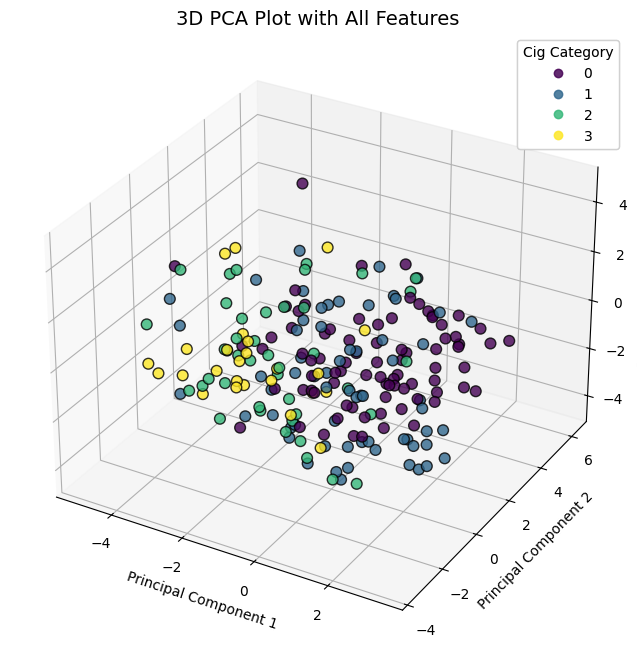

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = "2024_PersonalityTraits_SurveyData.xls"
data = pd.read_excel(file_path)

# Define the target variable and encode it
target_col = "How many cigarettes do you smoke each day?"
target_mapping = {
    "10 or less cigarettes/day": 0,
    "11 to 20 cigarettes": 1,
    "21 to 30 cigarettes": 2,
    "31 cigarettes/day or more": 3
}
data["cig_category"] = data[target_col].replace(target_mapping)

# Drop rows with missing target
data = data.dropna(subset=["cig_category"])

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Select all numeric features
features = data.drop(columns=["cig_category", target_col]).select_dtypes(include=["number"]).columns
X = data[features]
y = data["cig_category"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 components for visualization
X_pca = pca.fit_transform(X_scaled)

# 3D Scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=y,
    cmap='viridis',
    alpha=0.8,
    edgecolor='k',
    s=60
)
ax.set_title("3D PCA Plot with All Features", fontsize=14)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
legend = ax.legend(*scatter.legend_elements(), title="Cig Category")
ax.add_artist(legend)
plt.show()


Model selected here is SVM with RBF kernel, having the highest test accuracy so far, more data is needed to improve the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Check for overfitting
if train_accuracy > test_accuracy + 0.10:
    print("Your model is likely overfitting.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("Your model is likely underfitting.")
else:
    print("Your model is likely balanced.")


Confusion Matrix (Test):
[[11  0  0  0]
 [ 3  3  2  0]
 [ 3  1  5  0]
 [ 0  0  1  3]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.75      0.38      0.50         8
           2       0.62      0.56      0.59         9
           3       1.00      0.75      0.86         4

    accuracy                           0.69        32
   macro avg       0.76      0.67      0.68        32
weighted avg       0.71      0.69      0.67        32

Train Accuracy: 0.6166666666666667
Test Accuracy: 0.6875
Your model is likely underfitting.


TSNE is used to visualize the data in 3D, then using 3 components, we tried to apply SVM with RBF kernel but again the model was overfitting having 100% accuracy on the training set and 44% on the test set

C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


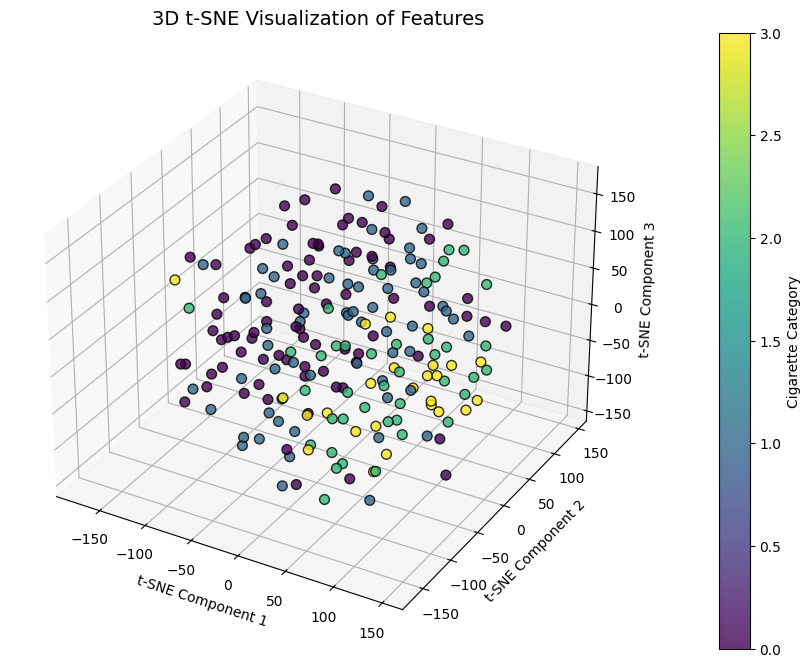

In [17]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE with adjusted parameters
tsne = TSNE(n_components=3, random_state=42, perplexity=50, n_iter=2000)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting the t-SNE results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each class (cig_category)
scatter = ax.scatter(
    X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], 
    c=y, cmap='viridis', alpha=0.8, s=50, edgecolor='k'
)

# Add a colorbar and labels
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label("Cigarette Category")

ax.set_title("3D t-SNE Visualization of Features", fontsize=14)
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
plt.show()


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train-test split using t-SNE components
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Evaluation
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Overfitting Check
if train_accuracy > test_accuracy + 0.10:
    print("Your model is likely overfitting.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("Your model is likely underfitting.")
else:
    print("Your model is likely balanced.")


Confusion Matrix (Test):
[[12  2  1  1]
 [ 8  3  1  0]
 [ 2  4  2  3]
 [ 0  0  2  2]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.55      0.75      0.63        16
           1       0.33      0.25      0.29        12
           2       0.33      0.18      0.24        11
           3       0.33      0.50      0.40         4

    accuracy                           0.44        43
   macro avg       0.39      0.42      0.39        43
weighted avg       0.41      0.44      0.41        43

Train Accuracy: 1.0
Test Accuracy: 0.4418604651162791
Your model is likely overfitting.


C:\Users\Roni\AppData\Local\Temp\ipykernel_21704\3989761902.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["cig_category"] = data[target_col].replace(target_mapping)
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to u

Silhouette Score for K-Means with k=4: 0.36


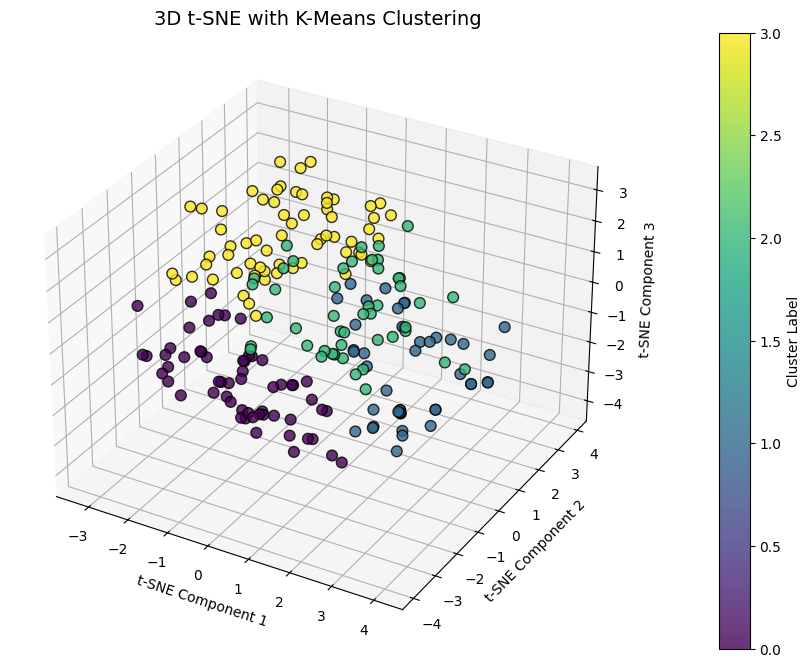


Cluster Assignments vs Actual Categories:
Actual Category   0   1   2   3
Cluster                        
0                15  14  17  12
1                11  13  11   9
2                21  16   9   1
3                35  20   5   3


In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Load the dataset and preprocessing
file_path = "2024_PersonalityTraits_SurveyData.xls"
data = pd.read_excel(file_path)

# Target variable encoding
target_col = "How many cigarettes do you smoke each day?"
target_mapping = {
    "10 or less cigarettes/day": 0,
    "11 to 20 cigarettes": 1,
    "21 to 30 cigarettes": 2,
    "31 cigarettes/day or more": 3
}
data["cig_category"] = data[target_col].replace(target_mapping)
data = data.dropna(subset=["cig_category"])  # Drop rows with missing target

# Feature selection
features = data.drop(columns=["cig_category", target_col]).select_dtypes(include=["number"]).columns
X = data[features]
y = data["cig_category"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42, perplexity=50, n_iter=2000)
X_tsne = tsne.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)

# Evaluate clustering with Silhouette Score
silhouette_avg = silhouette_score(X_tsne, kmeans_labels)
print(f"Silhouette Score for K-Means with k=4: {silhouette_avg:.2f}")

# 3D Scatter plot of clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=kmeans_labels,
    cmap='viridis',
    alpha=0.8,
    edgecolor='k',
    s=60
)
ax.set_title("3D t-SNE with K-Means Clustering", fontsize=14)
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")

# Add a colorbar for cluster labels
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label("Cluster Label")
plt.show()

# Compare clusters with the actual labels
print("\nCluster Assignments vs Actual Categories:")
cluster_comparison = pd.crosstab(kmeans_labels, y, rownames=['Cluster'], colnames=['Actual Category'])
print(cluster_comparison)
